In [4]:
import keyboard
import time

### Input
This is the maze expressed in a list of list. 1: blocked field 0: empty field

In [5]:
lab = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1],
       [1,1,1,1,1,1,1,1,1,1,1,1,1,1],
       [1,1,0,0,0,0,0,0,0,0,0,0,1,1],
       [1,1,0,1,1,1,1,1,1,0,1,1,1,1],
       [1,1,0,1,0,0,0,0,0,0,0,0,1,1],
       [1,1,0,1,0,1,1,1,1,1,1,0,1,1],
       [1,1,0,1,0,1,0,0,0,0,0,0,1,1],
       [1,1,0,0,0,1,1,0,1,1,1,0,1,1],
       [1,1,0,1,0,0,0,0,1,0,1,1,1,1],
       [1,1,0,1,1,0,1,0,0,0,0,0,1,1],
       [1,1,0,1,0,0,1,1,1,1,1,0,1,1],
       [1,1,0,0,0,1,1,0,0,0,0,3,1,1],
       [1,1,1,1,1,1,1,1,1,1,1,1,1,1],
       [1,1,1,1,1,1,1,1,1,1,1,1,1,1]]

In [6]:
allneighb = []
for y in range(-2,3):
    for x in range(-2,3):
        allneighb.append((x,y))

class Field:
    def __init__ (self, x, y):
        self.x = x
        self.y = y
        self.neighbours = [ (x + xoff, y + yoff) for xoff, yoff in
            ( (1, 0), (0, 1), (0, -1), (-1, 0) )
            if lab [y + yoff] [x + xoff] != 1 ]
        self.all_neighbours = [ (x + xoff, y + yoff) for xoff, yoff in
            tuple(allneighb)]
        
        if len(self.neighbours) == 1:
            self.fieldtype = 'dead end'
        if len(self.neighbours) >= 3:
            self.fieldtype = 'fork'
        if len(self.neighbours) == 2:
            neighbour1, neighbour2 = self.neighbours
            x1, y1 = neighbour1
            x2, y2 = neighbour2
            if x1 != x2 and y1 != y2:
                self.fieldtype = 'corner'
            else:
                self.fieldtype = 'straight path'
        
    def get_options(self):
        self.options = []
        for option in self.neighbours:
            xopt = option[0]
            yopt = option[1]
            if xopt > self.x and yopt == self.y:
                option = 'right'
            if xopt < self.x and yopt == self.y:
                option ='left'
            if xopt == self.x and yopt < self.y:
                option ='up'
            if xopt == self.x and yopt > self.y:
                option = 'down'
            self.options.append(option)
        return self.options

    def __repr__ (self):
        return '{}: ({})'.format ( (self.x, self.y), self.neighbours)
    
fields = {}
for y in range (14):
    for x in range (14):
        if lab [y] [x]: continue
        fields [x, y] = Field (x, y)

### Find all direct neighbors
For PDDL implementation without metric

In [15]:
# neighbours
neighbourslist = []
for y in range (14):
    for x in range (14):
        if lab [y] [x]: continue
        field = Field(x, y)
        neighbours = field.neighbours
        for neighbour in neighbours:
            start = 'x'+str(field.x)+'y'+str(field.y)
            endx = neighbour[0]
            endy = neighbour[1]
            end = 'x'+str(endx)+'y'+str(endy)
            entry = '(neighbour ' + str(start) + ' ' + str(end) + ')'
            neighbourslist.append(entry)

In [16]:
# objects
objectslist = []
for y in range (14):
    for x in range (14):
        if lab [y] [x]: continue
        field = Field(x, y)   
        start = 'x'+str(field.x)+'y'+str(field.y)
        objectslist.append(start)

In [32]:
# save to txt file
f=open('PDDL-objects.txt','w')
for row in objectslist:
    entry = row + '\n'
    f.write(entry)
f.close()

In [33]:
# save to txt file
f=open('PDDL-init.txt','w')
for row in neighbourslist:
    entry = row + '\n'
    f.write(entry)
f.close()

### Find paths to neighbors
For PDDL implementation with metric. Unfortunately, This is not used since the PDDL is not capable of dealing with metrics

In [34]:
def move(position,direction):
    if direction == 'up':
        xdir = 0
        ydir = -1
    if direction == 'down':
        xdir = 0
        ydir = 1
    if direction == 'right':
        xdir = 1
        ydir = 0
    if direction == 'left':
        xdir = -1
        ydir = 0
    
    # move if possible
    possibilities = Field(position.x,position.y).neighbours
    if (position.x + xdir, position.y + ydir) in possibilities:
        position_new = Field(position.x + xdir, position.y + ydir)
        #print(position)
        return position_new, position_new
    else:
        position_new = position
        return 'invalid', position_new

In [35]:
def walk_to_fork(position,direction):
    while True:
        position, position_fork = move(position,direction)
        if position == 'invalid':
            #print('invalid move')
            break
        if len(position.neighbours) > 2:
            #print('this is a fork')
            break
    return position_fork

In [36]:
def get_paths(origin):
    next_fork = []
    for option in origin.get_options():
        position = walk_to_fork(origin, option)
        next_fork.append((position.x,position.y))
    #print('from this position you can go to:', next_fork)
    return next_fork

### User Input to walk the maze
This is not need at all. But it shows very nicely, how the above functions work

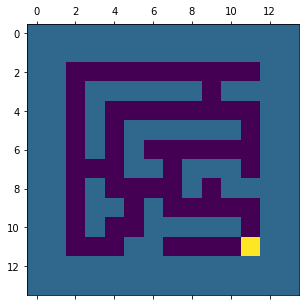

Exit game


UnboundLocalError: local variable 'xdir' referenced before assignment

In [49]:
# initialize position
# field(2,2) is top left corner
position = Field(2,2)

from IPython.display import clear_output
plot_board(position,lab)
while True:
    direction = key_detect()
    position = walk_to_fork(position,direction)
    clear_output(wait=True)
    plot_board(position,lab)
    time.sleep(1)

In [46]:
def key_detect():
    while True:  # making a loop
        if keyboard.is_pressed('up arrow'):
            print('Up!')
            direction = 'up'
            break  # finishing the loop
        if keyboard.is_pressed('down arrow'):
            print('Down!')
            direction = 'down'
            break  # finishing the loop
        if keyboard.is_pressed('left arrow'):
            print('Left!')
            direction = 'left'
            break  # finishing the loop
        if keyboard.is_pressed('right arrow'):
            print('Right!')
            direction = 'right'
            break  # finishing the loop
        if keyboard.is_pressed('esc'):
            print('Exit game')
            direction = -1
            break
    return direction

### Plot functions

In [38]:
def print_board(position,lab):
    for y in range (12):
        print("\n", end="")
        for x in range (12):
            if y == position.y and x == position.x:
                print('D', end="")
            elif lab[y][x] == 1:
                print('#', end="")
            elif lab[y][x] == 0:
                print(' ', end="")

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import copy
def plot_board(position,lab):
    try:
        fig.clear()
    except:
        fig = plt.figure(figsize=(10,5))

        ax1 = fig.add_subplot(1,1,1)

        # Make a 9x9 grid...
        image = copy.deepcopy(lab)
        image[position.y][position.x] = 2
        image[11][11] = 3
        ax1.matshow(image)
        plt.show()

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_board_hidden(position,lab):
    try:
        fig.clear()
    except:
        fig = plt.figure(figsize=(10,5))

        ax1 = fig.add_subplot(1,1,1)

        image = np.ones((14,14),dtype=int)
        for (x,y) in position.all_neighbours:
            image[y][x] = lab[y][x]
        image[position.y][position.x] = 2
        
        ax1.matshow(image)
        plt.show()

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_pddl_path(lab_pddl):
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,1,1)
    ax1.matshow(lab_pddl)
    plt.show()

### Visualize PDDL output

In [44]:
def visualize_pddl(path, start, target):
    split = re.split('; |, |\)|\ |\n',path)

    res = [i for i in split if 'x' in i]


    arr = np.array(res)
    arr = np.unique(arr)
    lab_pddl = copy.deepcopy(lab)
    for element in arr:
        y = int(element.split('y')[1])
        x = element.split('y')[0]
        x = int(x.split('x')[1])
        lab_pddl[y][x] = 2
    # define start position
    lab_pddl[start[1]][start[0]] = 4
    # define target position
    lab_pddl[target[1]][target[0]] = 3
    plot_pddl_path(lab_pddl)

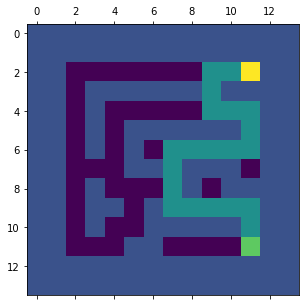

In [45]:
path = open('PDDL_output.txt','r').read()
import re
import numpy as np

start = (11,2) #(x,y)
end = (11,11) #(x,y)
visualize_pddl(path, start, end)

# Playground

In [9]:
def step_forward(position,direction):
    if direction == 'up':
        xdir = 0
        ydir = -1
    if direction == 'down':
        xdir = 0
        ydir = 1
    if direction == 'right':
        xdir = 1
        ydir = 0
    if direction == 'left':
        xdir = -1
        ydir = 0
    
    position_old = copy.deepcopy(position)
    
    if len(position.get_options()) == 1:
        print('dead end')
        return position
    if len(position.get_options()) == 2:
        for option.

SyntaxError: invalid syntax (<ipython-input-9-5b9e1b8e4ee3>, line 21)